**Continuation (1): A time-series should not have the data scrambled and should ideally be modeled by an RNN such as an LSTM**

This is a continuation of the previously submitted work. But now a more careful process is applied to first clean the data, respect its chronology, and implement a better model such as an LSTM.

The steps are:

(1) Each of the 51 data sets will be now kept separate, with time order preserved.

(2) Some of the data sets have a few missing rows. These are now filled by the last existing row, which seems more correct than using the mean value. Thus all the data sets are now of length 5000 (at 50 Hz, this means 100 s of observation).

(3) The split is the same as before: train/validate/test = 70%/15%/15%, however now it occurs on the data set level, thus it is train/validate/test = first 35 data sets/next 8 data sets/last 8 data sets.

(4) In fitting the models we use shuffle=False and a batch_size = 5000 (the size of each data set).

In [57]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/challenge')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import joblib as joblib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

features, labels = joblib.load('/content/drive/My Drive/challenge/data.dat')

print(len(features))
print(len(labels))

51
51


In [59]:
n_samples = len(features)
print(n_samples)
for i in range(n_samples):
  print(features[i].shape, labels[i].shape)

51
(4979, 30) (4979, 5)
(4966, 30) (4966, 5)
(4944, 30) (4944, 5)
(4966, 30) (4966, 5)
(4966, 30) (4966, 5)
(4958, 30) (4958, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(4937, 30) (4937, 5)
(4959, 30) (4959, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(4974, 30) (4974, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30) (5000, 5)
(5000, 30)

In [60]:
for i in range(len(features)):
  print(features[i].shape[0])

4979
4966
4944
4966
4966
4958
5000
5000
4937
4959
5000
5000
5000
5000
5000
5000
5000
4974
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [61]:
n_time_steps = min([features[i].shape[0] for i in range(len(features))])
print(n_time_steps)
n_time_steps = max([features[i].shape[0] for i in range(len(features))])
print(n_time_steps)
n_features = features[-1].shape[1]
n_labels = labels[-1].shape[1]
print(n_samples, n_time_steps, n_features)
print(n_labels)

4937
5000
51 5000 30
5


In [62]:
features_extended = []
labels_extended = []
for i in range(n_samples):
  features_extended.append(np.full((n_time_steps, n_features), np.NaN))
  labels_extended.append(np.full((n_time_steps, n_labels), np.NaN))

print(features_extended)
print(labels_extended)

[array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan

In [63]:
features_extended[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [64]:
labels_extended[0]

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

Instead of imputing mean for the missing rows (nan values), use the last non-nan row; this intuitively seems more proper to avoid an unphysical sudden change in a feature or label.

In [65]:

#for i in range(n_samples):
#  features_extended[i] = np.where(np.isnan(features_extended[i]), np.ma.array(features_extended[i], mask=np.isnan(features_extended[i])).mean(axis=0), features_extended[i])

#for i in range(n_samples):
#  labels_extended[i] = np.where(np.isnan(labels_extended[i]), np.ma.array(labels_extended[i], mask=np.isnan(labels_extended[i])).mean(axis=0), labels_extended[i])

for i in range(n_samples):
  for j in range(features[i].shape[0]):
      features_extended[i][j,:] = features[i][j,:]
      labels_extended[i][j,:] = labels[i][j,:]
  for j in range(features[i].shape[0], features_extended[i].shape[0]):
    features_extended[i][j,:] = features[i][-1,:]
    labels_extended[i][j,:] = labels[i][-1,:]

In [66]:
features_extended[0]

array([[341., 347., 341., ..., 289., 319., 253.],
       [341., 347., 341., ..., 289., 319., 253.],
       [341., 348., 341., ..., 289., 320., 253.],
       ...,
       [353., 366., 352., ..., 297., 329., 253.],
       [353., 366., 352., ..., 297., 329., 253.],
       [353., 366., 352., ..., 297., 329., 253.]])

In [67]:
features_extended[6]

array([[341., 351., 344., ..., 289., 326., 249.],
       [343., 351., 344., ..., 289., 326., 250.],
       [343., 352., 345., ..., 289., 326., 250.],
       ...,
       [347., 354., 342., ..., 292., 328., 250.],
       [347., 354., 341., ..., 292., 327., 250.],
       [348., 354., 341., ..., 292., 327., 251.]])

In [68]:
labels_extended[0]

array([[ 0.22357153,  0.99496208,  0.9940664 ,  0.99074757,  0.91400573],
       [ 0.41729854,  0.966014  ,  0.9855725 ,  0.98592047,  0.95746513],
       [ 0.48011878,  0.96245373,  0.97715618,  0.98331914,  0.96457863],
       ...,
       [ 0.66263708, -0.01864924,  0.97818341,  0.99152175,  0.97322957],
       [ 0.66263708, -0.01864924,  0.97818341,  0.99152175,  0.97322957],
       [ 0.66263708, -0.01864924,  0.97818341,  0.99152175,  0.97322957]])

In [69]:
labels_extended[6]

array([[0.43893767, 0.92950599, 0.96534301, 0.98771034, 0.97779767],
       [0.43861785, 0.93203866, 0.96526262, 0.98699533, 0.97795311],
       [0.44241947, 0.9371996 , 0.96759891, 0.98651075, 0.97713577],
       ...,
       [0.50392182, 0.95871953, 0.97180332, 0.96983296, 0.96772247],
       [0.50635417, 0.96951422, 0.97576246, 0.97381956, 0.9723318 ],
       [0.51060372, 0.97616196, 0.97973472, 0.97788348, 0.9745093 ]])

In [70]:
X = np.array(features_extended)
print(X.shape)
#X = np.vstack(X)
#print(X.shape)

(51, 5000, 30)


In [71]:
# Normalize data to have feature values between 0 and 1:
# divide by max possible feature value (1024 = 10-bit resolution)
# Can also save memory by reducing resolution to 4 bytes
X = X.astype('float32') / 1024.0 # below will also use StandardScaler, will train on train set, better for NN applications
np.min(X), np.max(X), np.mean(X), np.std(X)

(0.08300781, 0.41796875, 0.2788339, 0.055174924)

In [72]:
y = np.array(labels_extended)
print(y.shape)
#y = np.vstack(y)
#print(y.shape)

(51, 5000, 5)


In [73]:
# Can also safely reduce resolution of the labels to 4 bytes
y = y.astype('float32')
np.min(y), np.max(y), np.mean(y), np.std(y)

(-0.85305923, 0.9999999, 0.4763818, 0.61013037)

In [74]:
print(X.shape)
print(y.shape)

(51, 5000, 30)
(51, 5000, 5)


In [75]:
# same splitting percentages:
# train/valid_test split = 70%/30%, valid/test split = 50%/50%
# Therefore, train/valid/test split = 70%/15%/15%

# perhaps should not use this for such time series data, but the splitting code below leads to problems in the NN fits 
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, random_state=42)

###

# Preserve the time information!!!

# The splitting code below leads to problems in the NN fits so dont use it (maybe only with RNNs)
# Be careful in splitting time series data: using train_test_split will randomly reorder the data
# The simple code here does the same split without reordering any data
# train / validate / test split = first 70% / next 15% / last 15%

print(n_samples)
n_samples = X.shape[0]
print(n_samples)
n_samples_train = int(X.shape[0]*0.70)
print(n_samples_train)

X_train = X[:n_samples_train]
X_valid_test = X[n_samples_train:]
y_train = y[:n_samples_train]
y_valid_test = y[n_samples_train:]

n_samples_valid_test = X_valid_test.shape[0]
print(n_samples_valid_test)
n_samples_valid = int(X_valid_test.shape[0]*0.50)
n_samples_test = int(X_valid_test.shape[0]*0.50)
print(n_samples_valid)
print(n_samples_test)
X_valid = X_valid_test[:int(X_valid_test.shape[0]*0.50)]
X_test = X_valid_test[int(X_valid_test.shape[0]*0.50):]
y_valid = y_valid_test[:int(X_valid_test.shape[0]*0.50)]
y_test = y_valid_test[int(X_valid_test.shape[0]*0.50):]

# or can use this:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preserve the time information by using shuffle=False
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, shuffle=False)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, shuffle=False)
###

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_valid_test.shape, y_valid_test.shape)
print(X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

51
51
35
16
8
8
(51, 5000, 30) (51, 5000, 5)
(35, 5000, 30) (35, 5000, 5) (16, 5000, 30) (16, 5000, 5)
(8, 5000, 30) (8, 5000, 5) (8, 5000, 30) (8, 5000, 5)


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaler only operates on 2d arrays so first transform to 2d, then scale, then transform back to 3d

# transform to 2d

print(X_train.shape)
X_train = np.vstack(X_train)
print(X_train.shape)

print(X_valid_test.shape)
X_valid_test = np.vstack(X_valid_test)
print(X_valid_test.shape)

print(X_valid.shape)
X_valid = np.vstack(X_valid)
print(X_valid.shape)

print(X_test.shape)
X_test = np.vstack(X_test)
print(X_test.shape)

print()

# train the scaler on train data only, then apply to all arrays (to prevent data leakage)

### from sklearn.preprocessing import MinMaxScaler
### scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid_test = scaler.transform(X_valid_test)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# X arrays: convert to the type of 3d arrays expected by LSTM: X_array(data_lines, time_steps_to_predict, n_features)

time_steps_to_predict = 1

X_train = X_train.reshape(n_samples_train*n_time_steps, time_steps_to_predict, n_features)
X_valid_test = X_valid_test.reshape(n_samples_valid_test*n_time_steps, time_steps_to_predict, n_features)
X_valid = X_valid.reshape(n_samples_valid*n_time_steps, time_steps_to_predict, n_features)
X_test = X_test.reshape(n_samples_test*n_time_steps, time_steps_to_predict, n_features)

# y arrays: convert to regular 2d arrays: y_array(data_lines, n_labels)

y_train = y_train.reshape(n_samples_train*n_time_steps, n_labels)
y_valid_test = y_valid_test.reshape(n_samples_valid_test*n_time_steps, n_labels)
y_valid = y_valid.reshape(n_samples_valid*n_time_steps, n_labels)
y_test = y_test.reshape(n_samples_test*n_time_steps, n_labels)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_valid_test.shape, y_valid_test.shape)
print(X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

print()

(35, 5000, 30)
(175000, 30)
(16, 5000, 30)
(80000, 30)
(8, 5000, 30)
(40000, 30)
(8, 5000, 30)
(40000, 30)

(51, 5000, 30) (51, 5000, 5)
(175000, 1, 30) (175000, 5) (80000, 1, 30) (80000, 5)
(40000, 1, 30) (40000, 5) (40000, 1, 30) (40000, 5)



In [77]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#  tensorflow 2.0 library provides functions for deep neural networks 
import tensorflow
print(tensorflow.__version__)

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM

2.4.1


**Model: LSTM (a default one suggested by keras) fit4a**

In [78]:
input_shape0, input_shape1, input_shape2 = X_train.shape[0], X_train.shape[1], X_train.shape[2]
print(input_shape0, input_shape1, input_shape2)
output_shape0, output_shape1 = y_train.shape[0], y_train.shape[1]
print(output_shape0, output_shape1)

model = Sequential()
# Add a LSTM layer with 128 internal units.
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# Add a Dense layer with 5 units.
model.add(Dense(y_train.shape[1], activation='linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

175000 1 30
175000 5
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128)               81408     
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 645       
Total params: 82,053
Trainable params: 82,053
Non-trainable params: 0
_________________________________________________________________


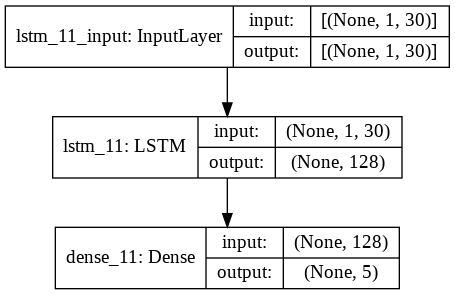

In [79]:
# plot the graph of the model and save to file
plot_model(model, to_file='model4_lstm.png', show_shapes=True, show_layer_names=True)

In [80]:
batch_size = 5000 # this is the time duration = 5000/(50 Hz) = 100 seconds, of each independent measurement 
epochs = 75

In [81]:
%%time 

history4a_lstm = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid), shuffle=False)

Epoch 1/75
35/35 [==============================] - 2s 17ms/step - loss: 0.6003 - mean_squared_error: 0.6003 - val_loss: 0.2804 - val_mean_squared_error: 0.2804
Epoch 2/75
35/35 [==============================] - 0s 6ms/step - loss: 0.3614 - mean_squared_error: 0.3614 - val_loss: 0.5580 - val_mean_squared_error: 0.5580
Epoch 3/75
35/35 [==============================] - 0s 6ms/step - loss: 0.2699 - mean_squared_error: 0.2699 - val_loss: 0.3545 - val_mean_squared_error: 0.3545
Epoch 4/75
35/35 [==============================] - 0s 6ms/step - loss: 0.2067 - mean_squared_error: 0.2067 - val_loss: 0.2842 - val_mean_squared_error: 0.2842
Epoch 5/75
35/35 [==============================] - 0s 6ms/step - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.2462 - val_mean_squared_error: 0.2462
Epoch 6/75
35/35 [==============================] - 0s 6ms/step - loss: 0.1456 - mean_squared_error: 0.1456 - val_loss: 0.2376 - val_mean_squared_error: 0.2376
Epoch 7/75
35/35 [=====================

In [82]:
def plot_history(history):
    
    #-----------------------------------------------------------
    # Retrieve results on training and validation data sets
    # for each training epoch
    #-----------------------------------------------------------
    
    mse      = history.history['mean_squared_error']
    val_mse  = history.history['val_mean_squared_error']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    epochs   = range(1,len(mse)+1) 
    
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    
    #------------------------------------------------
    # Plot training and validation mse per epoch
    #------------------------------------------------
    ax1.plot(epochs, mse,  label='Training mse')
    ax1.plot(epochs, val_mse,  label='Validation mse')
    ax1.set_title('Loss = MSE')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('mse')
    #ax1.set_ylim(0.5,1.2)
    ax1.legend()

    #------------------------------------------------
    # Plot training and validation rmse per epoch
    #------------------------------------------------
    ax2.plot(epochs, np.sqrt(mse),  label='Training rmse')
    ax2.plot(epochs, np.sqrt(val_mse),  label='Validation rmse')
    ax2.set_title('RMSE')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('rmse')
    #ax2.set_ylim(0.5,1.2)
    ax2.legend()

    fig.tight_layout()
    plt.show()

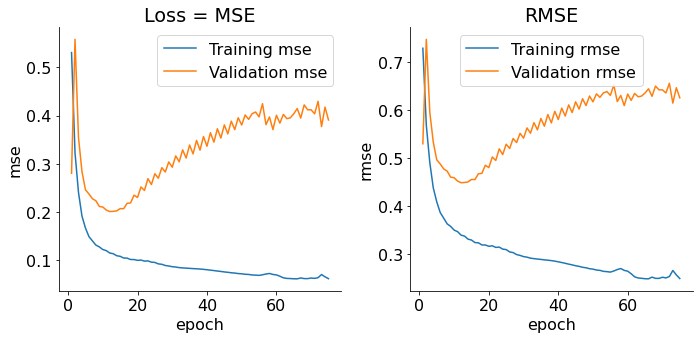

In [83]:
plot_history(history4a_lstm)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))

8/8 - 0s - loss: 0.3908 - mean_squared_error: 0.3908
test_loss = test_mse, test_rmse, test_mae
            0.3908    0.6251    0.4725


There is definitely over-fitting visible in the above plots. We can implement early stopping to extract the best fit parameters for this model.

**Model: LSTM (a default one suggested by keras) fit4b (with early stopping)**

In [85]:
# simple early stopping
# see: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

input_shape0, input_shape1, input_shape2 = X_train.shape[0], X_train.shape[1], X_train.shape[2]
print(input_shape0, input_shape1, input_shape2)
output_shape0, output_shape1 = y_train.shape[0], y_train.shape[1]
print(output_shape0, output_shape1)

model = Sequential()
# Add a LSTM layer with 128 internal units.
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# Add a Dense layer with 5 units.
model.add(Dense(y_train.shape[1], activation='linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

175000 1 30
175000 5
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 128)               81408     
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
Total params: 82,053
Trainable params: 82,053
Non-trainable params: 0
_________________________________________________________________


In [86]:
%%time 

history4b_lstm_es = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid), shuffle=False, callbacks=[es])

Epoch 1/75
35/35 [==============================] - 2s 17ms/step - loss: 0.5915 - mean_squared_error: 0.5915 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 2/75
35/35 [==============================] - 0s 6ms/step - loss: 0.3557 - mean_squared_error: 0.3557 - val_loss: 0.4572 - val_mean_squared_error: 0.4572
Epoch 3/75
35/35 [==============================] - 0s 6ms/step - loss: 0.2659 - mean_squared_error: 0.2659 - val_loss: 0.2923 - val_mean_squared_error: 0.2923
Epoch 4/75
35/35 [==============================] - 0s 6ms/step - loss: 0.2010 - mean_squared_error: 0.2010 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 5/75
35/35 [==============================] - 0s 5ms/step - loss: 0.1659 - mean_squared_error: 0.1659 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 6/75
35/35 [==============================] - 0s 6ms/step - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.2063 - val_mean_squared_error: 0.2063
Epoch 7/75
35/35 [=====================

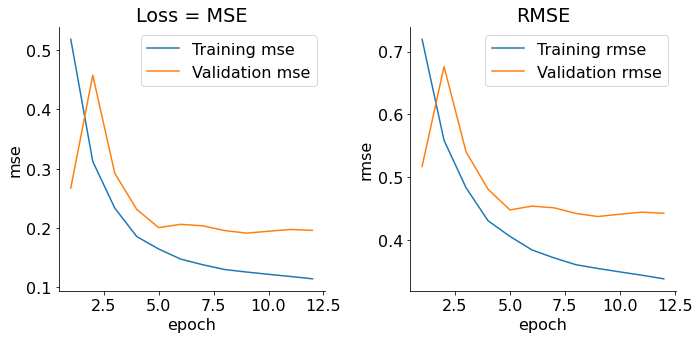

In [87]:
plot_history(history4b_lstm_es)

In [88]:
test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))

8/8 - 0s - loss: 0.2974 - mean_squared_error: 0.2974
test_loss = test_mse, test_rmse, test_mae
            0.2974    0.5453    0.4128


**Results summary (so far)**

In [3]:
from tabulate import tabulate
#tabulate.PRESERVE_WHITESPACE = True

print(tabulate([
  ["Data size", "Method",             "params", "Fit name", "Lr",  "Decay", "Epoch", "Run time [mm:ss]", "train_rmse", "test_rmse", "test_mae"],
  [ 25000, "SVR",                      "",          "0a",       "",     "",      "",      ">10:00",          "0.3742",     "0.1400",   "0.0200"],
  [ 25000, "ANN (hidden:  60, 40,  -)", " 4,505",   "1a",       "1e-3", 0.9,      75,     "",                 0.0755,       "",        ""],
  [ 25000, "ANN (hidden:  60, 40,  -)", " 4,505",   "1a",       "1e-3", 0.9,     150,     " 03:03",          "0.0670",      0.0789,     0.0443],
  ["-----------", "---------------------------------------------", "--------", "----------", "-----", "-------", "-------", "------------------", "------------", "-----------", "----------"],
  ["", "", "", "", "", "", "", "", "", "", ""],

  [254649, "ANN (hidden:  60, 40,  -)", " 4,505",   "1 ",       "1e-3", 0.9,      75,     " 13:55",           0.1421,       0.1433,     0.0891],
  [254649, "ANN (hidden: 100, 50, 25)", " 9,555",   "2 ",       "1e-3", 0.9,      75,     " 14:36",           0.1086,       0.1133,     0.0618],
  [254649, "ANN (hidden: 300, 30,  -)", "18,485",   "3 ",       "1e-3", 0.9,      75,     " 14:09",          "0.1100",     "0.1140",    0.0678],
  ["-----------", "---------------------------------------------", "--------", "----------", "-----", "-------", "-------", "------------------", "------------", "-----------", "----------"],
  ["", "", "", "", "", "", "", "", "", "", ""],

  ["255000^1,2", "LSTM, explicit lag: 0   (internal units: 128)", "82,053",  "4b", "1e-3", 0.9, "12^3", "00:04", 0.3342,     0.5453,     0.4128],
  ["255000^1,2", "LSTM, explicit lag: 0   (internal units: 128)", "82,053",  "4a", "1e-3", 0.9, 75,     "00:20", 0.2472,     0.6251,     0.4725]],
  headers="firstrow"))
print()

print('^1 In these fits, unlike in the preceding fits, the few missing data rows in each set were interpolated as the last present row in that set.')
print('^2 In these fits, unlike in the preceding fits, the data was not shuffled; i.e., the data sets were not mixed, and also, time order was maintained in each set.')
print('^3 With early stopping (patience = 3).')
print('^4 A non-zero time lag refers to treating the vector autoregression problem by introducing an explicit lag, as in')
print('   https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/. A non-zero value will be introduced in the next notebook.')

#print(np.sqrt(0.0611))
#print(np.sqrt(0.1117))

Data size    Method                                         params    Fit name    Lr     Decay    Epoch    Run time [mm:ss]    train_rmse    test_rmse    test_mae
-----------  ---------------------------------------------  --------  ----------  -----  -------  -------  ------------------  ------------  -----------  ----------
25000        SVR                                                      0a                                   >10:00              0.3742        0.1400       0.0200
25000        ANN (hidden:  60, 40,  -)                      4,505     1a          1e-3   0.9      75                           0.0755
25000        ANN (hidden:  60, 40,  -)                      4,505     1a          1e-3   0.9      150      03:03               0.0670        0.0789       0.0443
-----------  ---------------------------------------------  --------  ----------  -----  -------  -------  ------------------  ------------  -----------  ----------

254649       ANN (hidden:  60, 40,  -)            